https://scikit-learn.org/stable/

Datasets Bundled with Scikit-Learn

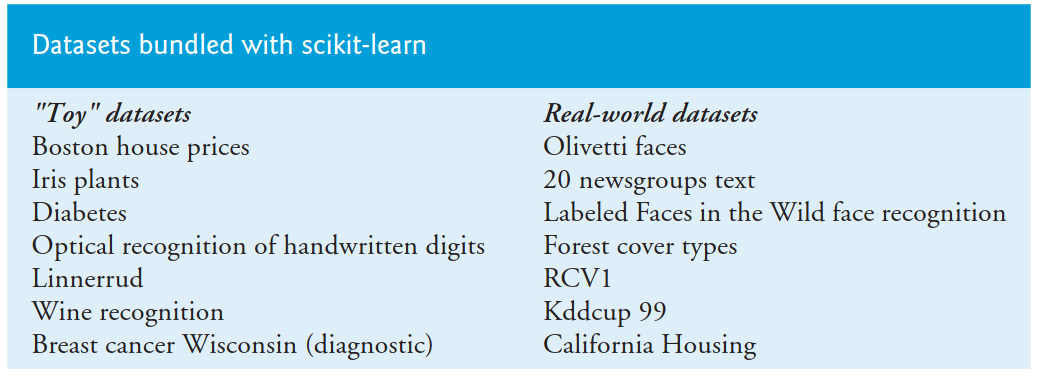

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [1]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

In [2]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
random_state=11)

In [4]:
X_train.shape

(93, 1)

In [5]:
X_test.shape

(31, 1)

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [8]:
linear_regression.coef_

array([0.01939167])

In [9]:
linear_regression.intercept_

-0.30779820252658396

In [10]:
predicted = linear_regression.predict(X_test)

In [11]:
expected = y_test

In [12]:
for p, e in zip(predicted[::5], expected[::5]):print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [13]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [14]:
predict(2019)

array([38.84399018])

[1895 2018]


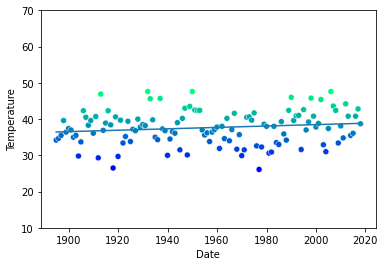

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
print(x)
y = predict(x)

line = plt.plot(x, y)